<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 (Assignment) -- Your first neural networks </h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u4_utils</code>
- <code>matplotlib.pyplot</code>
- <code>numpy</code>
- <code>torch</code>
- <code>torch.nn</code>

In [71]:
%matplotlib notebook


In [127]:
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings(r'ignore')


Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>sum</i> of <code>[7, 2, 3]</code> and printing the result.

In [73]:
torch.sum(torch.as_tensor([7, 2, 3], dtype=torch.float32))


tensor(12.)

# Exercise 1
Normally, machine learning specific tasks start with digging into some <i>data set</i>. This time, we want to emphasize a different approach by focusing on miscellaneous kinds of <i>functions</i> at the beginning. <b>Exercise 1</b> is all about

- <i>convex</i> functions

and how their <i>derivative</i> can be used for optimizing the same. So, your <b>first task</b> of this exercise requires you to perform the following steps:

- Define&emsp;$y = x^{d}_{0} + x^{d}_{1} + \ldots{} + x^{d}_{n}$&emsp;as a <i>Python</i> function.
- Define the corresponding <i>derivative</i> as a <i>Python</i> function.

Note, that both <i>Python</i> functions should accept <i>exactly one</i> mandatory parameter, namely some one dimensional <i>numpy array</i> consisting of real values. Regardless of this requirement, optional parameters are allowed, though (e.g. to specify the corresponding <i>degree</i> of the current function of interest).

In [75]:
def pythonfunc(xt, degree=1):
    plus = 0
    for x in xt:
        plus += x ** degree
    return plus
def deri_pythonfunc(xtn, degree=1):
    return np.array(degree*xtn**(degree-1))


After you have <i>implemented</i> said function as well as the corresponding derivative, we want to visualize both to get more familiar with them as well as to get some <i>feeling</i> for their behaviour. Most often, some kind of visualization vastly supports problem finding processes (often termed as <i>debugging</i>), so keep this always in mind.

- Create two <i>numpy arrays</i> with values in the range of $[-2, 2]$, with a step size of $0.1$ (<i>hint:</i> look at <code>arange</code> supplied by <i>numpy</i>).
- Visualize the <i>convex</i> function as well as its <i>derivative</i> in $(1.2\ \ 1.5)$.

In [168]:
x0 = np.array([1.2, 1.5])
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)


<IPython.core.display.Javascript object>


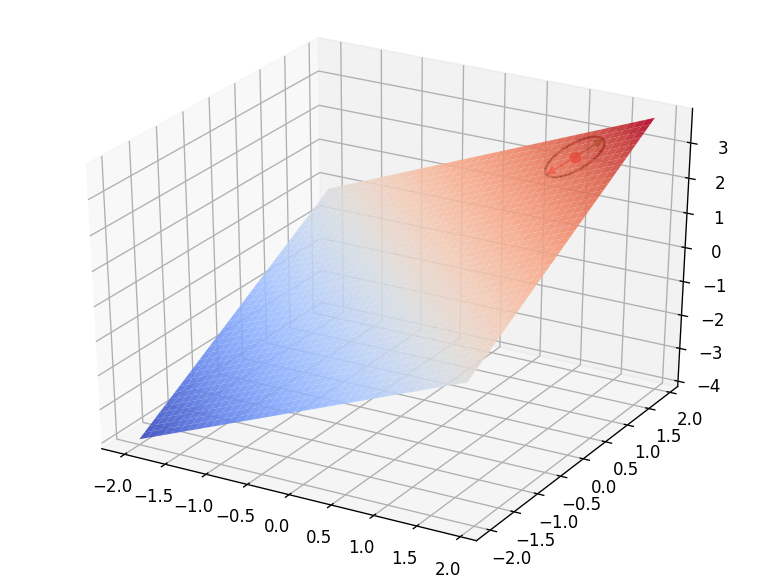

In [169]:
u4.plot_function(x0, X, Y, pythonfunc, deri_pythonfunc)


As the <b>second</b> and <b>last task</b> of this exercise, we want to know the <i>exact</i> value of the <i>derivative</i> of some <i>result</i> of the convex function with respect to its <i>input</i>. For this to happen, the following steps are required:

- Transform the list $[1.2, 1.5]$ to a <i>numpy array</i> of type <i>float32</i>.
- Compute the <i>result</i> of the <i>convex</i> function applied to said newly created <i>input</i>
- Compute the <i>derivative</i> of the <i>result</i> with respect to the input.

Print the <i>result</i> as well as all <i>intermediate</i> values to the standard output.

In [78]:
a_list = [1.2, 1.5]
an_array =np.asarray(a_list, dtype=np.float32)


In [79]:
pythonfunc(an_array)


2.700000047683716

In [80]:
deri_pythonfunc(an_array)


array([1., 1.], dtype=float32)

# Exercise 2


This exercise is quite similar to the <i>previous</i> one, with a difference in the type of functions to be analyzed. <b>Exercise 2</b> is all about

- <i>non-convex</i> functions

and how their <i>derivative</i> can be used for optimizing the same. So, your <b>first task</b> of this exercise requires you to perform the following steps:

- Define&emsp;$y = \tanh\left(x^{d}_{0} + x^{d}_{1} + \ldots{} + x^{d}_{n}\right)$&emsp;as a <i>Python</i> function.
- Define the corresponding <i>derivative</i> as a <i>Python</i> function.

Note, that both <i>Python</i> functions should accept <i>exactly one</i> mandatory parameter, namely some one dimensional <i>numpy array</i> consisting of real values. Regardless of this requirement, optional parameters are allowed, though (e.g. to specify the corresponding <i>degree</i> of the current function of interest).

In [81]:
def noncon_func(xt, degree=1):
    plus = 0
    for x in xt:
        plus += x ** degree
    return np.tanh(plus)
 

In [82]:
def deri_noncon_func(xt, degree=1):
    plus = 0
    plus_two = 0
    for x in xt:
        plus += x ** degree
        plus_two += degree * x ** (degree-1)
 
    return np.repeat(1*plus_two/(np.cosh(plus)*2), len(xt))


After you have <i>implemented</i> said function as well as the corresponding derivative, we want to visualize both to get more familiar with them as well as to get some <i>feeling</i> for their behaviour.

- Create two <i>numpy arrays</i> with values in the range of $[-2, 2]$, with a step size of $0.1$ (<i>hint:</i> look at <code>arange</code> supplied by <i>numpy</i>).
- Visualize the <i>non-convex</i> function as well as its <i>derivative</i> in $(0.9\ \ 0.9)$.

The input of the <i>non-convex</i> function is in the same range as the input of the <i>convex</i> one. Nonetheless, their result (and so does their visualization) might differ. Do you notice any major <i>differences</i>? If you do, briefly describe them, otherwise leave a short notice.

In [170]:
x0 = np.array([0.9, 0.9])
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)


<IPython.core.display.Javascript object>


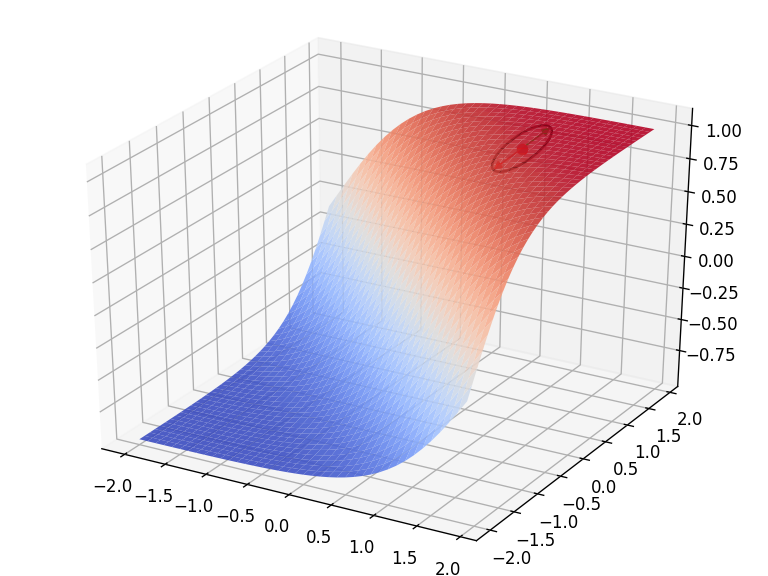

In [171]:
u4.plot_function(x0, X, Y, noncon_func, deri_noncon_func)


Similar to the <i>last tasl</i> of the <i> previous</i> exercise, the <b>second</b> and <b>last task</b> of this one requires you tocompute the <i>exact</i> value of the <i>derivative</i> of some <i>result</i> of the non-convex function with respect to its <i>input</i>. For this to happen, the following steps are necessary:

- Transform the list $[0.9, 0.9]$ to a <i>numpy array</i> of type <i>float32</i>.
- Compute the <i>result</i> of the <i>non-convex</i> function applied to said newly created <i>input</i>
- Compute the <i>derivative</i> of the <i>result</i> with respect to the input.

Print the <i>result</i> as well as all <i>intermediate</i> values to the standard output.

In [85]:
a_list = [0.9, 0.9]
an_array =np.asarray(a_list, dtype=np.float32)


In [86]:
noncon_func(an_array)


0.94680600790822

In [87]:
deri_noncon_func(an_array)


array([0.32180488, 0.32180488])

# Exercise 3

As you are now an expert in <i>convex</i> and <i>non-convex</i> functions, you would for sure happily get your hands dirty by applying your knowledge to some data set. In this exercise you will be working with one composed of various <i>images</i> of fashion items. For curious minds, more information regarding this data set can be found at:

<cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite>

For the <b>first task</b> of this exercise you are required to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set (returns the <i>training</i> as well as the <i>test</i> set).
- Display the first <i>eight</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the eight images?

In [88]:
X = torch.rand(42) 


In [89]:
train_loader, test_loader = u4.load_fashion_mnist()


<IPython.core.display.Javascript object>


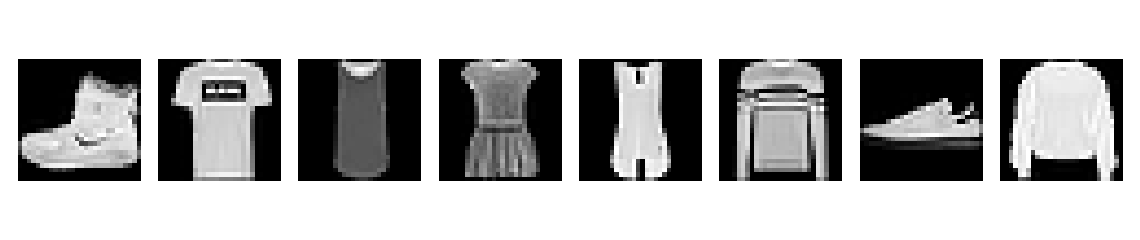

In [158]:
u4.display_FashionMNIST(train_loader, 8)


Possible labels for pictures:
1. picture: shoe
2. picture: T-shirt
3. picture: dress (here it is not quite clear which label is ordered to the 3. picture)
4. picture: dress
5. picture: dungarees
6. picture: sweater
7. picture: show
8. picture: sweater

In order to define a <i>logistic regression</i> model as well as a <i>dense feedforward neural network</i> for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the <i>input dimensionality</i> of the data set.
- Set the output dimensionality to be $d_{out} = 10$

In [91]:
train_shape = train_loader[1][0].shape
input_dim = train_shape[0]*train_shape[1]*train_shape[2]
print("Input dimension: {}.".format(input_dim))


Input dimension: 784.


In [92]:
output_dim = 10


Last time (for <i>assignment 3</i>) you were supplied with an implementation of <i>logistic regression</i> by us. As this would be too simple (and obviosuly no <i>fun</i> at all) for you, the <b>second task</b> of this exercise comprises:

- Implement a <i>Python class</i> <code>LogisticRegression</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [93]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim): 
        super(LogisticRegression, self).__init__()
        self.n_classes = output_dim
        self.layer = nn.Linear(input_dim, self.n_classes)

    def forward(self, x):
        return self.layer(x)
    

Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 10</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>logistic regression</i> model using your <i>own</i> implementation, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.

In [94]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')


In [95]:
X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)


Train the previously defined <i>logistic regression</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [96]:
for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.292177
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.095394
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.955090
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.908597
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.832407
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.709509
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.639880
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.754032
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.672883
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.522016

Test set: Average loss: 0.0007, Accuracy: 7600/10000 (76.00%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.851433
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.858909
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.673062
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.700501
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.682177
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.702860
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.854585
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.591668
Train Epoch: 02 [57

In [97]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.767716
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.417704
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.662774
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.478228
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.561452
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.441583
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.672758
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.549177
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.405537
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.412278

Test set: Average loss: 0.0009, Accuracy: 7757/10000 (77.57%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.821581
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.626049
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.580344
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.480856
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.299490
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.734884
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.585650
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.859877
Train Epoch: 02 [57

In [98]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.081444
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.823779
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.814728
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.695892
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.568669
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.535840
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.381493
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.507938
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.325329
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.224635

Test set: Average loss: 0.0013, Accuracy: 6558/10000 (65.58%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.253750
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.276280
Train Epoch: 02 [19200/60000 (32%)]	Loss: 1.143154
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.079033
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.097765
Train Epoch: 02 [38400/60000 (64%)]	Loss: 1.086673
Train Epoch: 02 [44800/60000 (75%)]	Loss: 1.070111
Train Epoch: 02 [51200/60000 (85%)]	Loss: 1.131202
Train Epoch: 02 [57

In [99]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, 2):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.416154
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.009016
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.883950
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.060683
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.845839
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.863772
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.664097
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.890357
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.854171
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.605254

Test set: Average loss: 0.0007, Accuracy: 7570/10000 (75.70%)



In [100]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, 2):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.623719
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.459815
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.466307
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.401814
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.531317
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.501782
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.509458
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.475480
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.488805
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.715913

Test set: Average loss: 0.0006, Accuracy: 7858/10000 (78.58%)



In [101]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.866341
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.649937
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.731097
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.710724
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.521556
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.864336
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.457092
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.968619
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.338766
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.527809

Test set: Average loss: 0.0005, Accuracy: 8098/10000 (80.98%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.443863
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.648438
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.457521
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.690601
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.612834
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.486214
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.638010
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.548903
Train Epoch: 02 [57

In [102]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.5, momentum=0.5, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.211680
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.477326
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.092173
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.057060
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.797467
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.606459
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.814238
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.633153
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.940371
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.478348

Test set: Average loss: 0.0025, Accuracy: 6431/10000 (64.31%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.481231
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.827107
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.587399
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.660789
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.957201
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.456700
Train Epoch: 02 [44800/60000 (75%)]	Loss: 1.106949
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.564649
Train Epoch: 02 [57

In [103]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=2.2, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args.test_batch_size, shuffle=True)

model = LogisticRegression(input_dim, output_dim).to(device)
optimizer = u4.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    u4.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u4.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 22969476933650910544274921619456.000000
Train Epoch: 01 [12800/60000 (21%)]	Loss: nan
Train Epoch: 01 [19200/60000 (32%)]	Loss: nan
Train Epoch: 01 [25600/60000 (43%)]	Loss: nan
Train Epoch: 01 [32000/60000 (53%)]	Loss: nan
Train Epoch: 01 [38400/60000 (64%)]	Loss: nan
Train Epoch: 01 [44800/60000 (75%)]	Loss: nan
Train Epoch: 01 [51200/60000 (85%)]	Loss: nan
Train Epoch: 01 [57600/60000 (96%)]	Loss: nan
Train Epoch: 01 [60000/60000 (100%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: nan
Train Epoch: 02 [12800/60000 (21%)]	Loss: nan
Train Epoch: 02 [19200/60000 (32%)]	Loss: nan
Train Epoch: 02 [25600/60000 (43%)]	Loss: nan
Train Epoch: 02 [32000/60000 (53%)]	Loss: nan
Train Epoch: 02 [38400/60000 (64%)]	Loss: nan
Train Epoch: 02 [44800/60000 (75%)]	Loss: nan
Train Epoch: 02 [51200/60000 (85%)]	Loss: nan
Train Epoch: 02 [57600/60000 (96%)]	Loss: nan
Train Epoch: 02 [60000/60000 (

Do you notice any serious differences? If yes, which settings lead to them? If not, try to argue about a possible reason.
0. lr     |        mom        |         epochs        |     accuracy for test set (in %)(values from a previous run)
1. 0.001     |     0.9         |        10           |      82.48
2. 0.1       |     0.9         |        10            |     81.43
3. 0.001     |     0.1          |       10           |      76.62
4. 0.001      |    0.9           |       1           |      75.91
5. 0.1        |    0.1           |       1            |     81.43
6. 0.1         |   0.1          |       10             |    84.13
7. 0.5          |  0.5           |      10             |    75.87
8. 2.2         |   0.9         |        10       |          81.76
9. 0.001       |   2.2      |           10         |        10.00

If the momentum is too high (here 2.2), then the accuracy adds only up to 10.00 % what is in comparison to the remaining result extremely low. It could be that a high momentum collect previous happening too exactly. So, the model can't fit the reality of dataset when it belongs to the training set too much in detail. 
Furthermore, the learning and amount of epochs don't seem to have a lot of influence on the accuracy. The reason for that could be the characteristics of the Fashion-MNIST dataset. 

On the basis of your <i>logistic regression</i> implementation, construct a <i>dense feedforward neural network</i> with the following attributes (to get you started, later on you will modify these settings in order to get a better performance on the corresponding test set):

- <i>One</i> input layer, accepting the same data as the <i>logistic regression</i> model.
- <i>Two</i> hidden layers with a dimensionality of $256$ each.
- <i>One</i> output layer, of the same output dimensionality as the <i>logistic regression</i> model. 

To summarize this task:

- Implement a <i>Python class</i> <code>DenseNeuralNet</code> as discussed during the lecture.
- Keep in mind, which <i>activation</i> function a <i>multi-class</i> setting requires.
- Optionally, <i>initialize</i> the parameters of the model in a different way.

In [104]:
class DenseNeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DenseNeuralNet, self).__init__()
        self.n_classes = output_dim
        self.layer=nn.Linear(input_dim, 256)
        self.layer1=nn.Linear(256, 256)
        self.layer2=nn.Linear(256, self.n_classes)

    def forward(self, x):
        x=torch.sigmoid(self.layer(x))
        y=torch.sigmoid(self.layer1(x))
        return self.layer2(x)
    

Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly (similar to the settings of the <i>logistic regression</i>):

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 10</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>dense feedforward neural network</i> model using your <i>own</i> implementation, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.

In [105]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)


Train the previously defined <i>dense feedforward neural network</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. As this kind of network behaves differently than a <i>logistic regression</i> model, experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [106]:
for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.249477
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.179143
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.068010
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.979417
Train Epoch: 01 [32000/60000 (53%)]	Loss: 1.836005
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.745582
Train Epoch: 01 [44800/60000 (75%)]	Loss: 1.665985
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.623864
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.545330
Train Epoch: 01 [60000/60000 (100%)]	Loss: 1.440268

Test set: Average loss: 0.0015, Accuracy: 6462/10000 (64.62%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.364690
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.309604
Train Epoch: 02 [19200/60000 (32%)]	Loss: 1.349928
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.127349
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.183710
Train Epoch: 02 [38400/60000 (64%)]	Loss: 1.056978
Train Epoch: 02 [44800/60000 (75%)]	Loss: 1.181893
Train Epoch: 02 [51200/60000 (85%)]	Loss: 1.217763
Train Epoch: 02 [57

In [107]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.019645
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.567880
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.427972
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.411029
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.349810
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.359871
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.545661
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.255399
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.408887
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.743882

Test set: Average loss: 0.0005, Accuracy: 8329/10000 (83.29%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.334117
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.240912
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.466958
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.306120
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.617486
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.336523
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.335814
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.440214
Train Epoch: 02 [57

In [108]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 2.341011
Train Epoch: 01 [12800/60000 (21%)]	Loss: 2.263655
Train Epoch: 01 [19200/60000 (32%)]	Loss: 2.273618
Train Epoch: 01 [25600/60000 (43%)]	Loss: 2.272427
Train Epoch: 01 [32000/60000 (53%)]	Loss: 2.265298
Train Epoch: 01 [38400/60000 (64%)]	Loss: 2.255407
Train Epoch: 01 [44800/60000 (75%)]	Loss: 2.250141
Train Epoch: 01 [51200/60000 (85%)]	Loss: 2.240419
Train Epoch: 01 [57600/60000 (96%)]	Loss: 2.229130
Train Epoch: 01 [60000/60000 (100%)]	Loss: 2.231493

Test set: Average loss: 0.0022, Accuracy: 4540/10000 (45.40%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 2.224298
Train Epoch: 02 [12800/60000 (21%)]	Loss: 2.205463
Train Epoch: 02 [19200/60000 (32%)]	Loss: 2.218513
Train Epoch: 02 [25600/60000 (43%)]	Loss: 2.197060
Train Epoch: 02 [32000/60000 (53%)]	Loss: 2.197385
Train Epoch: 02 [38400/60000 (64%)]	Loss: 2.186261
Train Epoch: 02 [44800/60000 (75%)]	Loss: 2.177077
Train Epoch: 02 [51200/60000 (85%)]	Loss: 2.158380
Train Epoch: 02 [57

In [109]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.242416
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.156984
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.082588
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.005088
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.842549
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.751147
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.628859
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.558029
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.461019
Train Epoch: 1 [60000/60000 (100%)]	Loss: 1.522627

Test set: Average loss: 0.0015, Accuracy: 6141/10000 (61.41%)



In [110]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.1, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.284727
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.988449
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.791645
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.702037
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.635405
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.661685
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.676947
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.580216
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.693598
Train Epoch: 1 [60000/60000 (100%)]	Loss: 0.566918

Test set: Average loss: 0.0006, Accuracy: 7834/10000 (78.34%)



In [111]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.1, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.476249
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.964046
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.025328
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.661318
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.685492
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.674029
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.738310
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.470046
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.512379
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.607482

Test set: Average loss: 0.0006, Accuracy: 7790/10000 (77.90%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.448570
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.450671
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.568906
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.446432
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.538893
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.493602
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.423726
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.439857
Train Epoch: 02 [57

In [112]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.5, momentum=0.5, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.760148
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.539320
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.443457
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.729424
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.353833
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.473433
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.501600
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.635448
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.466992
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.613488

Test set: Average loss: 0.0005, Accuracy: 8283/10000 (82.83%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.541020
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.637228
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.453704
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.618986
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.262576
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.547012
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.455775
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.327322
Train Epoch: 02 [57

In [113]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=2.2, momentum=0.9, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 1.340008
Train Epoch: 01 [12800/60000 (21%)]	Loss: 1.348055
Train Epoch: 01 [19200/60000 (32%)]	Loss: 1.156224
Train Epoch: 01 [25600/60000 (43%)]	Loss: 1.092695
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.867537
Train Epoch: 01 [38400/60000 (64%)]	Loss: 1.167868
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.939720
Train Epoch: 01 [51200/60000 (85%)]	Loss: 1.088278
Train Epoch: 01 [57600/60000 (96%)]	Loss: 1.189608
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.984627

Test set: Average loss: 0.0011, Accuracy: 5677/10000 (56.77%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: 1.023300
Train Epoch: 02 [12800/60000 (21%)]	Loss: 1.280457
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.910079
Train Epoch: 02 [25600/60000 (43%)]	Loss: 1.012207
Train Epoch: 02 [32000/60000 (53%)]	Loss: 1.260880
Train Epoch: 02 [38400/60000 (64%)]	Loss: 1.151805
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.912421
Train Epoch: 02 [51200/60000 (85%)]	Loss: 1.003851
Train Epoch: 02 [57

In [114]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=2.2, log_interval=100)

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

X = torch.rand(42) 

training_Loader = torch.utils.data.DataLoader(train_loader,batch_size=args2.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_loader,batch_size=args2.test_batch_size, shuffle=True)

model2 = DenseNeuralNet(input_dim, output_dim).to(device)
optimizer2 = u4.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

for epoch in range(1, args2.epochs + 1):
    u4.train(args2, model2, device, training_Loader, optimizer2, epoch, input_dim)
    u4.test(args2, model2, device, testing_Loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 48489768003875574813113079300096.000000
Train Epoch: 01 [12800/60000 (21%)]	Loss: nan
Train Epoch: 01 [19200/60000 (32%)]	Loss: nan
Train Epoch: 01 [25600/60000 (43%)]	Loss: nan
Train Epoch: 01 [32000/60000 (53%)]	Loss: nan
Train Epoch: 01 [38400/60000 (64%)]	Loss: nan
Train Epoch: 01 [44800/60000 (75%)]	Loss: nan
Train Epoch: 01 [51200/60000 (85%)]	Loss: nan
Train Epoch: 01 [57600/60000 (96%)]	Loss: nan
Train Epoch: 01 [60000/60000 (100%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 1000/10000 (10.00%)

Train Epoch: 02 [6400/60000 (11%)]	Loss: nan
Train Epoch: 02 [12800/60000 (21%)]	Loss: nan
Train Epoch: 02 [19200/60000 (32%)]	Loss: nan
Train Epoch: 02 [25600/60000 (43%)]	Loss: nan
Train Epoch: 02 [32000/60000 (53%)]	Loss: nan
Train Epoch: 02 [38400/60000 (64%)]	Loss: nan
Train Epoch: 02 [44800/60000 (75%)]	Loss: nan
Train Epoch: 02 [51200/60000 (85%)]	Loss: nan
Train Epoch: 02 [57600/60000 (96%)]	Loss: nan
Train Epoch: 02 [60000/60000 (

Do you notice any serious differences? If yes, which settings lead to them? If not, try to argue about a possible reason.
0. lr     |        mom        |         epochs        |     accuracy for test set (in %)(values from a previous run)
1. 0.001     |     0.9         |        10           |      88.41
2. 0.1       |     0.9         |        10            |     87.18
3. 0.001     |     0.1          |       10           |      65.37
4. 0.001      |    0.9           |       1           |      62.68
5. 0.1        |    0.1           |       1            |     77.32
6. 0.1         |   0.1          |       10             |    84.86
7. 0.5          |  0.5           |      10             |    86.63
8. 2.2         |   0.9         |        10       |          78.91
9. 0.001       |   2.2      |           10         |        10.00

If the momentum is too high (here 2.2), then the accuracy adds only up to 10.00 % what is in comparison to the remaining result extremely low. It could be that a high momentum collect previous happenings too exactly. So, the model can't fit the reality of dataset when it belongs to the training set too much in detail. 
When the momentum is low (here 0.1), then the accuracy adds only up to 65.37 %. This value is low when you compare it to the oters. It could be that a low momomentum collect too few information about previous happenings. That could lead to a lack of information.
Furthermore, the learning doesn't seem to have a lot of influence on the accuracy. The reason for that could be the characteristics of the Fashion-MNIST dataset. 
Finally, the combination of (learning rate 0.001,) a momentum of 0.9 and number of epochs = 1 lead to an accuracy of 62,68 %. When you modify the momentum to 0.1 the accuracy is 77.32 %. 

As already discussing during the lecture and experimented with during the <i>last</i> assignment, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set with a <code>flip_probability</code> of $p = 1$.
- Display the first <i>eight</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the three images? How do they differ from the previous visualization?

- Evaluate the previously trained <i>logistic regression</i> model on the flipped data set.
- Evaluate the previously trained <i>dense feedforward neural network</i> on the flipped data set.

If you experiment with different <i>hyperparameter settings</i> with respect to the original data set, do the performances differ when tested on the <i>flipped</i> data set?

In [115]:
X = torch.rand(42) 


In [116]:
train_flipped, test_flipped = u4.load_fashion_mnist(1.0)


<IPython.core.display.Javascript object>


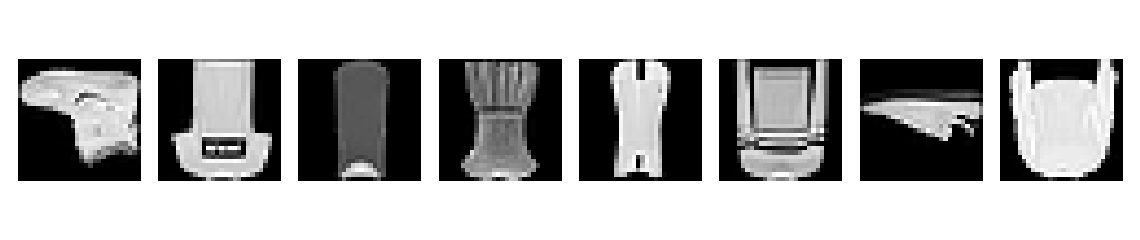

In [122]:
u4.display_FashionMNIST(train_flipped, 8)


Can you identify possible labels of the three images? How do they differ from the previous visualization?
When you know, that the pictures are flipped, you can identify the picture labels in the same way as non-flipped pictures. The problem is when you don't recognize that these pictures are flipped. So, I would have problems with the third and fifth picture in labeling. 

The difference to the originial pictures is that these pictures are upside down.

In [139]:
test_flipped_data = torch.utils.data.DataLoader(test_flipped,batch_size=args.test_batch_size, shuffle=True)

args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0024, Accuracy: 1247/10000 (12.47%)



In [134]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.9, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 999/10000 (9.99%)



If you experiment with different hyperparameter settings with respect to the original data set, do the performances differ when tested on the flipped data set?

In [141]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.9, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 933/10000 (9.33%)



In [142]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.1, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 859/10000 (8.59%)



In [143]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 1158/10000 (11.58%)



In [144]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=2.2, momentum=0.9, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 1023/10000 (10.23%)



In [146]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=2.2, log_interval=100)
model = LogisticRegression(input_dim, output_dim).to(device)

u4.test(args, model, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 957/10000 (9.57%)



Neuronal Net:

In [148]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.1, momentum=0.9, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 1191/10000 (11.91%)



In [149]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=0.1, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0024, Accuracy: 1000/10000 (10.00%)



In [150]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1, lr=0.001, momentum=0.9, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 1000/10000 (10.00%)



In [151]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=2.2, momentum=0.9, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 938/10000 (9.38%)



In [157]:
args2 = u4.SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, momentum=2.2, log_interval=100)
model2 = DenseNeuralNet(input_dim, output_dim).to(device)

u4.test(args2, model2, device, test_flipped_data, input_dim)



Test set: Average loss: 0.0023, Accuracy: 1000/10000 (10.00%)



If you experiment with different hyperparameter settings with respect to the original data set, do the performances differ when tested on the flipped data set?
Yes, now it isn't making a huge difference which values are chosen for the hyperparameters. They are always similar bad.